In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%pwd

'/home/ardigen/Documents/bertrand/bertrand/notebooks'

In [3]:
bertrand_results_mask = pd.read_csv("../../results/bertrand.csv")
bertrand_results_nomask = pd.read_csv("../../results/bertrand_nomask.csv")

In [4]:
bertrand_results_mask.head()

,rocs,aps,n,peptide,cv_seed,dataset,subset
0,0.584483,0.430601,48,CTELKLSDY,42,dataset_42,test
1,0.700725,0.657458,30,FLRGRAYGL,42,dataset_42,test
2,0.532850,0.320306,266,FRCPRRFCF,42,dataset_42,test
3,0.558673,0.443439,28,GLNKIVRMY,42,dataset_42,test
4,0.587313,0.402589,66,GPGHKARVL,42,dataset_42,test


In [5]:
bertrand_results_mask["mask"] = True
bertrand_results_nomask["mask"] = False

bertrand_results_df = pd.concat([bertrand_results_mask, bertrand_results_nomask])

In [6]:
bertrand_results_df.head()

,rocs,aps,n,peptide,cv_seed,dataset,subset,mask
0,0.584483,0.430601,48,CTELKLSDY,42,dataset_42,test,True
1,0.700725,0.657458,30,FLRGRAYGL,42,dataset_42,test,True
2,0.532850,0.320306,266,FRCPRRFCF,42,dataset_42,test,True
3,0.558673,0.443439,28,GLNKIVRMY,42,dataset_42,test,True
4,0.587313,0.402589,66,GPGHKARVL,42,dataset_42,test,True


In [7]:
nettcr_results_df = pd.read_csv("../../results/nettcr2.csv")
ergo_results_df = pd.read_csv("../../results/ergo.csv")

In [8]:
titan_results_df_mask = pd.read_csv("../../results/titan.csv")
titan_results_df_mask["mask"] = True

In [9]:
titan_results_df_nomask = pd.read_csv("../../results/titan_nomask.csv")
titan_results_df_nomask["mask"] = False

In [10]:
titan_results_df = pd.concat([titan_results_df_mask, titan_results_df_nomask]).reset_index(drop=True)

In [11]:
dlptcr_results_df_mask = pd.read_csv("../../results/dlptcr.csv")
dlptcr_results_df_mask["mask"] = True

In [12]:
dlptcr_results_df_nomask = pd.read_csv("../../results/dlptcr_nomask.csv")
dlptcr_results_df_nomask["mask"] = False

In [13]:
dlptcr_results_df = pd.concat([dlptcr_results_df_mask, dlptcr_results_df_nomask]).reset_index(drop=True)

In [14]:
nettcr_results_df = nettcr_results_df.rename(columns={"ds_seed": "dataset", "set": "subset"})
nettcr_results_df.dataset = "dataset_" + nettcr_results_df.dataset.astype(str)
nettcr_results_df.n = nettcr_results_df.n.astype(int)

In [44]:
ergo_results_df = ergo_results_df.rename(columns={"ds_seed": "dataset", "set": "subset"})
ergo_results_df.dataset = "dataset_" + ergo_results_df.dataset.astype(str)
ergo_results_df.n = ergo_results_df.n.astype(int)
ergo_results_df["mask"] = ergo_results_df["mask"].map({"F": False, "T": True})

In [45]:
ergo_results_df.head()

,rocs,aps,n,peptide,cv_seed,dataset,mask,subset,model
0,0.471301,0.191581,244,CTELKLSDY,42,dataset_dataset_42,False,test,ERGO
1,0.526488,0.296646,886,EIYKRWII,42,dataset_dataset_42,False,test,ERGO
2,0.590462,0.240913,1330,FRCPRRFCF,42,dataset_dataset_42,False,test,ERGO
3,0.600000,0.266667,12,GEIYKRWII,42,dataset_dataset_42,False,test,ERGO
4,0.656535,0.382368,783,IPSINVHHY,42,dataset_dataset_42,False,test,ERGO


In [46]:
titan_results_df.head()

,rocs,aps,n,peptide,cv_seed,dataset,subset,mask,model
0,0.525862,0.297412,48,CTELKLSDY,42,dataset_42,test,True,TITAN
1,0.511957,0.281985,30,FLRGRAYGL,42,dataset_42,test,True,TITAN
2,0.486597,0.241216,266,FRCPRRFCF,42,dataset_42,test,True,TITAN
3,0.595663,0.392634,28,GLNKIVRMY,42,dataset_42,test,True,TITAN
4,0.558999,0.273886,66,GPGHKARVL,42,dataset_42,test,True,TITAN


In [47]:
bertrand_results_df.loc[:, "model"] = "BERTrand"
ergo_results_df.loc[:, "model"] = "ERGO"
nettcr_results_df.loc[:, "model"] = "NetTCR2.0"
titan_results_df.loc[:, "model"] = "TITAN"
dlptcr_results_df.loc[:, "model"] = "DLpTCR"

In [48]:
results_df = pd.concat([bertrand_results_df, ergo_results_df, nettcr_results_df, titan_results_df, dlptcr_results_df])

In [49]:
results_df.loc[:, "subset"] = results_df["subset"].map(
    {"test": "Cross validation test set", "cancer": "Independent cancer set"}
)
results_df.loc[:, "mask"] = results_df["mask"].map({False: "Basic filtering", True: "Outliers filtering"})

In [50]:
results_df.head(2)

,rocs,aps,n,peptide,cv_seed,dataset,subset,mask,model
0,0.584483,0.430601,48,CTELKLSDY,42,dataset_42,Cross validation test set,Outliers filtering,BERTrand
1,0.700725,0.657458,30,FLRGRAYGL,42,dataset_42,Cross validation test set,Outliers filtering,BERTrand


In [51]:
results_df[results_df.n >= 5].groupby(["model", "subset", "mask"]).rocs.agg("mean").unstack()

mask                                 Basic filtering  Outliers filtering
model     subset                                                        
BERTrand  Cross validation test set         0.689313            0.645296
          Independent cancer set            0.725822            0.685308
DLpTCR    Cross validation test set         0.657155            0.582466
          Independent cancer set            0.670966            0.587794
ERGO      Cross validation test set         0.654468            0.577079
          Independent cancer set            0.668119            0.586522
NetTCR2.0 Cross validation test set         0.629726            0.569234
          Independent cancer set            0.645300            0.578768
TITAN     Cross validation test set         0.648307            0.581866
          Independent cancer set            0.667090            0.584327

In [52]:
pd.set_option("display.max_rows", 500)

In [53]:
pd.crosstab(
    results_df["mask"] + "_" + results_df.model, results_df.dataset + "_" + results_df.cv_seed.astype(str)
).T.head(63)

row_0,Basic filtering_BERTrand,Basic filtering_DLpTCR,Basic filtering_ERGO,Basic filtering_NetTCR2.0,Basic filtering_TITAN,Outliers filtering_BERTrand,Outliers filtering_DLpTCR,Outliers filtering_ERGO,Outliers filtering_NetTCR2.0,Outliers filtering_TITAN
col_0,,,,,,,,,,
dataset_42_42,296,296,0,296,592,285,285,0,285,285
dataset_42_43,288,288,0,288,288,290,290,0,290,290
dataset_42_44,289,289,0,289,289,290,290,0,290,290
dataset_42_45,285,285,0,285,285,291,291,0,291,291
dataset_42_46,293,293,0,293,293,288,288,0,288,288
dataset_42_47,290,290,0,290,290,290,290,0,290,290
dataset_42_48,287,287,0,287,287,292,292,0,292,292
dataset_42_49,286,286,0,286,286,294,294,0,294,294
dataset_42_50,289,289,0,289,289,290,290,0,290,290


In [56]:
# AUROC nopeptide baseline
auroc_baseline_outliers = pd.read_csv(
    "../../results/bertrand_tcronly_baseline.csv"
)
auroc_baseline_nooutliers = pd.read_csv(
    "../../results/bertrand_tcronly_baseline_nomask.csv"
)


auroc_baseline_outliers.subset = auroc_baseline_outliers.subset.map(
    {"test": "Cross validation test set", "cancer": "Independent cancer set"}
)


auroc_baseline_nooutliers.subset = auroc_baseline_nooutliers.subset.map(
    {"test": "Cross validation test set", "cancer": "Independent cancer set"}
)

pd.concat(
    [
        auroc_baseline_outliers.assign(mask="Outliers filtering"),
        auroc_baseline_nooutliers.assign(mask="Basic filtering"),
    ]
).groupby(["mask", "subset"])[["rocs", "aps"]].agg(["mean", "std"]).round(2)

auroc_baseline = (
    pd.concat(
        [
            auroc_baseline_outliers.assign(mask="Outliers filtering"),
            auroc_baseline_nooutliers.assign(mask="Basic filtering"),
        ]
    )
    .groupby(["subset", "mask"])
    .rocs.mean()
)

auroc_baseline

subset                     mask              
Cross validation test set  Basic filtering       0.640017
                           Outliers filtering    0.554707
Independent cancer set     Basic filtering       0.677149
                           Outliers filtering    0.584647
Name: rocs, dtype: float64

In [57]:
results_df_agg = (
    results_df[results_df.n >= 5]
    .groupby(["model", "subset", "mask", "dataset", "cv_seed"])
    .rocs.agg(["mean", "std"])
    .reset_index()
)

In [58]:
results_df_agg.rename(columns={"mean": "roc", "std": "roc_std"}, inplace=True)

In [59]:
# Data for cancer peptides plot
pep_res_df = bertrand_results_df[
    (bertrand_results_df["mask"] == True)
    & (bertrand_results_df["subset"] == "cancer")
    & (bertrand_results_df["n"] >= 5)
].copy()
# Extract info about peptide clusters
df_1 = pd.read_csv("../../results/negative_decoys/datasets/dataset_42.csv.gz")
pep_to_cluster = df_1.groupby("peptide_seq").peptide_cluster.agg("first")
pep_res_df.loc[:, "peptide_cluster"] = pep_to_cluster.loc[pep_res_df.peptide].values
n_by_cluster = pep_res_df.groupby("peptide").agg("first").groupby("peptide_cluster").n.sum()
pep_res_df.loc[:, "peptide_cluster_n"] = n_by_cluster.loc[pep_res_df.peptide_cluster].values
pep_res_df.sort_values(["peptide_cluster_n", "n"], ascending=[False, False], inplace=True)
pep_res_df.loc[:, "Peptide"] = (
    pep_res_df.peptide + " (n=" + pep_res_df.n.astype(str) + ")"
)  # + pep_res_df.peptide_cluster
pep_res_df.loc[:, "AUROC"] = pep_res_df.rocs
peptide_order = pep_res_df.groupby("peptide").n.agg("first").sort_values(ascending=False)


N = 30
pep_res_df_head = pep_res_df[pep_res_df.peptide.isin(peptide_order.head(N).index)]

pep_res_mean = pep_res_df_head.groupby("Peptide", sort=False).agg(
    {
        "AUROC": ["mean", "std"],
        "peptide_cluster": "first",
    }
)

cancer_means = pep_res_mean.AUROC["mean"]
cancer_stds = pep_res_mean.AUROC["std"]
total_mean_std = pep_res_df.groupby(["cv_seed", "dataset"]).rocs.agg(["mean", "std"]).mean(axis=0)
cancer_means.loc["TOTAL"] = total_mean_std["mean"]
cancer_stds.loc["TOTAL"] = total_mean_std["std"]

/tmp/ipykernel_36637/1930521576.py:8: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,12,13,14,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,42,43,44,45,46,47,48,49,51,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("../../results/negative_decoys/datasets/dataset_42.csv.gz")
/tmp/ipykernel_36637/1930521576.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_means.loc["TOTAL"] = total_mean_std["mean"]
/tmp/ipykernel_36637/1930521576.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_stds.loc["TOTAL"] = total_mean_std["std"]


In [60]:
pep_res_mean = pep_res_df.groupby("Peptide", sort=False).AUROC.agg("mean")
print((pep_res_mean >= auroc_baseline.loc[("Independent cancer set", "Outliers filtering")]).value_counts())

True     62
False    12
Name: AUROC, dtype: int64


In [61]:
def plot_peptides(ax):
    """
    plots per-peptide vertical barplot - subplot E
    """
    ax.barh(
        cancer_means.index[-1],
        cancer_means.iloc[-1],
        xerr=cancer_stds.iloc[-1],
        capsize=5,
        color="#53A40D",
        height=0.75,
    )
    ax.barh(
        cancer_means.index[::-1][1:],
        cancer_means[::-1][1:],
        xerr=cancer_stds[::-1][1:],
        capsize=3,
        color="#1F77B4",
        height=0.75,
    )
    baseline = auroc_baseline.loc[("Independent cancer set", "Outliers filtering")]
    ax.vlines(baseline, -1, N + 1, color="red", linestyle="--")
    ax.vlines(0.5, -1, N + 1, color="black", linestyle="--")
    ax.set_xlim(0.0, 1.0)
    ax.set_xlabel("AUROC")

In [62]:
line1 = None
line2 = None

In [63]:
def plot_benchmarks(x, y, yerr, **kwargs):
    """
    plots 1 barplot - subplots A, B, C, D
    """
    global line1, line2
    ax = plt.gca()
    data = kwargs.pop("data")
    kwargs.pop("color")
    sns.barplot(
        data=data,
        x=x,
        y=y,
        ax=ax,
        capsize=0.1,
        ci="sd",
        **kwargs,
        order=["NetTCR2.0", "ERGO", "TITAN", "DLpTCR", "BERTrand"],
        palette=["#EF553B", "#1F77B4", "#FF7F0E", "#AB63FA", "#53A40D"]
    )
    auroc_mean = data.groupby("model")[y].agg("mean")
    auroc_mean = auroc_mean.reindex(["NetTCR2.0", "ERGO", "TITAN", "DLpTCR", "BERTrand"])
    for i, roc in enumerate(auroc_mean):
        if np.isnan(roc):
            continue
        text = "%.2f" % roc
        ax.text(i, 0.3, text, color="white", fontweight="bold", fontsize=15, ha="center", va="center")
    baseline = auroc_baseline.loc[data["subset"].iloc[0], data["mask"].iloc[0]]
    line1 = ax.hlines(baseline, -0.5, 4.5, color="red", linestyle="--")
    line2 = ax.hlines(0.5, -0.5, 4.5, color="black", linestyle="--")

In [64]:
results_df_agg.model.value_counts()

BERTrand     252
DLpTCR       252
ERGO         252
NetTCR2.0    252
TITAN        250
Name: model, dtype: int64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


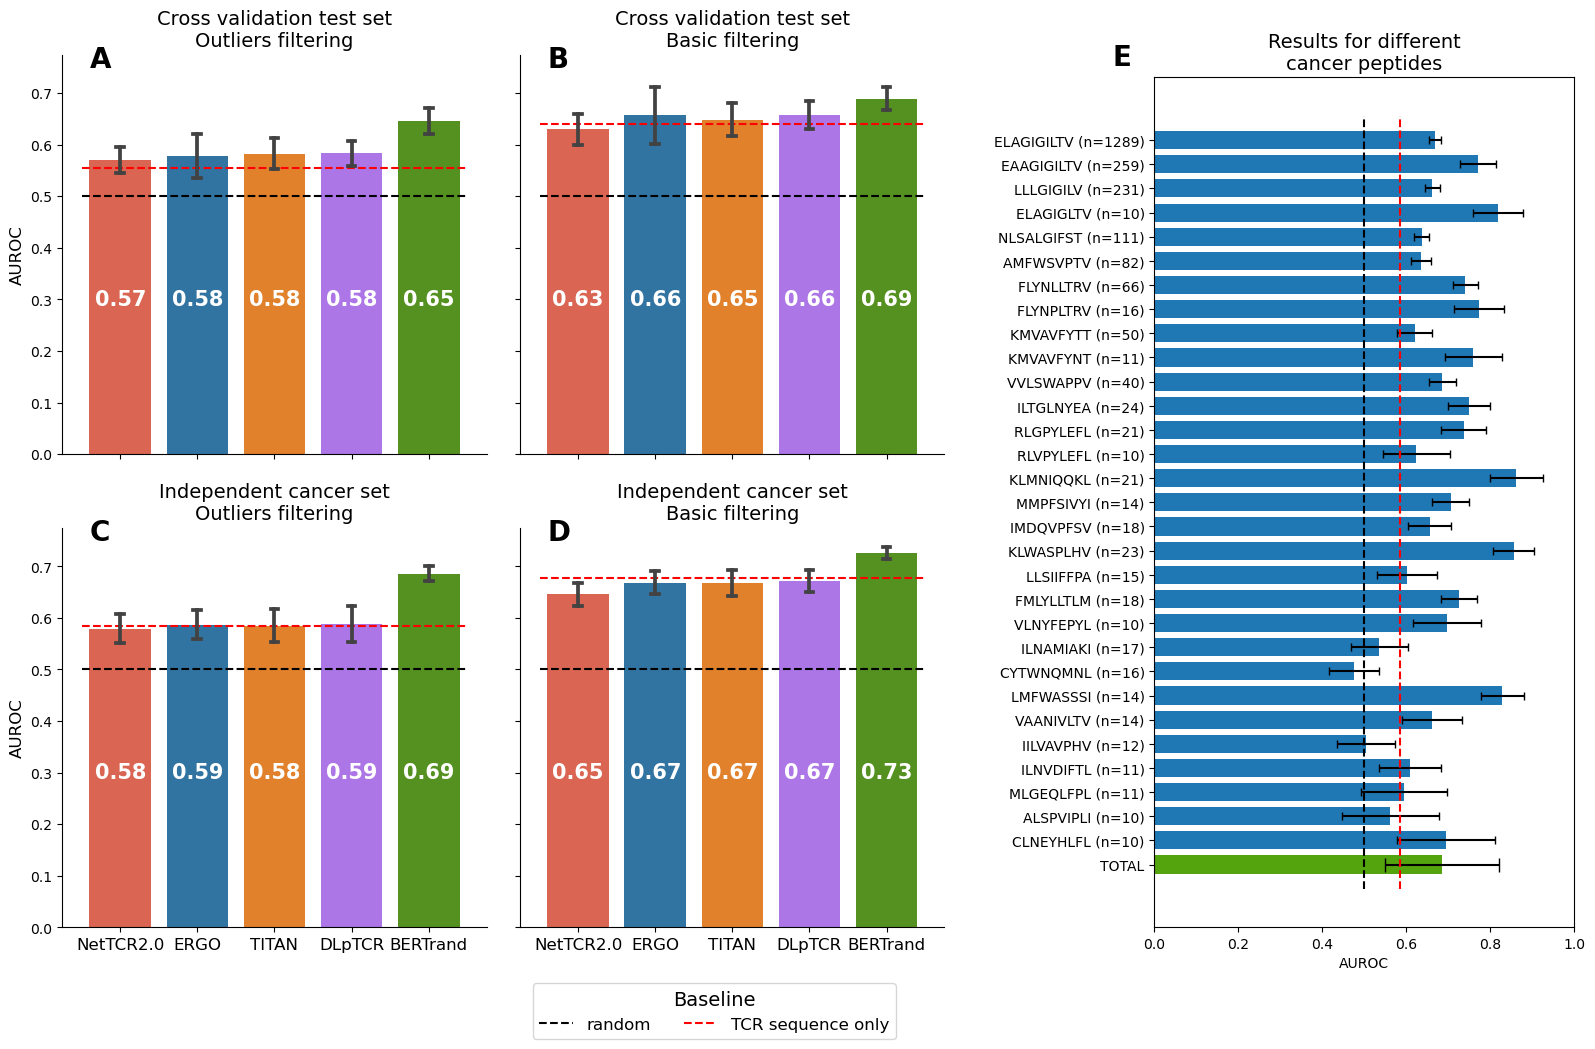

In [65]:
g = sns.FacetGrid(
    results_df_agg,
    col="mask",
    row="subset",
    col_order=["Outliers filtering", "Basic filtering"],
)
g.map_dataframe(plot_benchmarks, "model", "roc", "roc_std")

g.set_titles(template="{row_name}\n{col_name}", size=14)  # {row_name}\n{col_name}
[plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12) for ax in g.axes.flat]
[ax.set_xlabel("") for ax in g.axes.flat]
g.axes[0, 0].set_ylabel("AUROC", fontsize=12)
g.axes[1, 0].set_ylabel("AUROC", fontsize=12)


for ax, letter in zip(g.axes.flat, ["A", "B", "C", "D"]):
    ax.text(-0.4, 0.75, letter, fontweight="bold", fontsize=20)


g.fig.subplots_adjust(bottom=0.07, left=0.07, right=0.7)


# g.figure.subplots_adjust()
ax = g.fig.add_axes([0.85, 0.07, 0.3, 0.85], label="axis1")
ax.text(-0.1, 33.1, "E", fontweight="bold", fontsize=20)

plot_peptides(ax)
ax.set_title("Results for different\ncancer peptides", fontsize=14)
g.fig.set_size_inches(14, 10)
legend = g.fig.legend(
    handles=[line2, line1],
    labels=["random", "TCR sequence only"],
    title="Baseline",
    fontsize=12,
    ncol=2,
    loc="lower left",
    bbox_to_anchor=(0.4, -0.05),
)
plt.setp(legend.get_title(), fontsize=14)
# from matplotlib.transforms import Bbox
# g.figure.savefig('comparison.png', bbox_inches="tight")

plt.savefig("figure4.eps", format="eps", bbox_inches="tight")
plt.show()